In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

### Basic feature clean-up

In [2]:
commentors = pd.read_csv('../data/cleaned/comment_features.csv', index_col=0, header=0)
print(commentors.shape)

# Drop non-feature columns
to_drop = ['commentor.1', 'min', 'max', 'username']
commentors.drop(to_drop, axis=1, inplace=True)
print(commentors.shape)

# Replace NaNs
commentors.fillna(0, inplace=True)

(165718, 56)
(165718, 52)


### Inspect relationships between features

In [ ]:
# viz of feature pairplots

### Scale features and reduce dimensionality

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Scale to the range: 0 to 1
scaler = MinMaxScaler(feature_range=[0, 1])
commentors_rescaled = scaler.fit_transform(commentors)

# Reduce dimensionality to 2
pca = PCA(n_components=2)
commentors_pca = pca.fit(commentors_rescaled)
print(pca.explained_variance_ratio_)

[0.75119073 0.08389815]


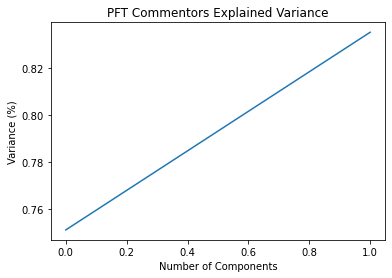

In [6]:
# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('PFT Commentors Explained Variance')
plt.show()

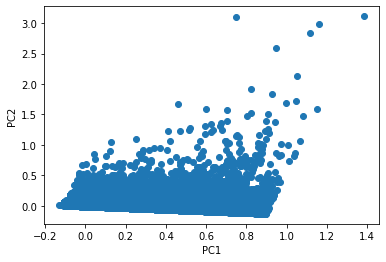

In [11]:
# Visualize result of PCA
commentors_pca = pca.fit_transform(commentors_rescaled)
plt.scatter(commentors_pca[:,0], commentors_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)
for i in range(2,10):
    cluster = KMeans(n_clusters=i, random_state=42)
    cluster_labels = cluster.fit_predict(commentors_pca)
    silhouettee_avg = silhouette_score(commentors_pca, cluster_labels, random_state=42)
    print(f'{i} clusters results in sil score of {silhouettee_avg}')